<a href="https://colab.research.google.com/github/peteryu24/petercoding-python/blob/main/mnist_multi_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train),(x_test, y_test) = mnist.load_data()
#change tensor's shape
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
#change to ndarray
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
#change to one-hot code
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#neural network structure layout
n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),
kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer
='random_uniform',bias_initializer='zeros'))
#learning neural network
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

#predict through
res=mlp.evaluate(x_test,y_test,verbose=0)
print("Accuracy: ",res[1]*100)


11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 6s - loss: 0.0431 - accuracy: 0.8427 - val_loss: 0.0285 - val_accuracy: 0.9085 - 6s/epoch - 13ms/step
Epoch 2/30
469/469 - 6s - loss: 0.0223 - accuracy: 0.9281 - val_loss: 0.0183 - val_accuracy: 0.9419 - 6s/epoch - 12ms/step
Epoch 3/30
469/469 - 6s - loss: 0.0167 - accuracy: 0.9473 - val_loss: 0.0153 - val_accuracy: 0.9515 - 6s/epoch - 12ms/step
Epoch 4/30
469/469 - 6s - loss: 0.0139 - accuracy: 0.9571 - val_loss: 0.0141 - val_accuracy: 0.9573 - 6s/epoch - 12ms/step
Epoch 5/30
469/469 - 6s - loss: 0.0122 - accuracy: 0.9632 - val_loss: 0.0119 - val_accuracy: 0.9617 - 6s/epoch - 12ms/step
Epoch 6/30
469/469 - 6s - loss: 0.0110 - accuracy: 0.9679 - val_loss: 0.0115 - val_accuracy: 0.9644 - 6s/epoch - 12ms/step
Epoch 7/30
469/469 - 6s - loss: 0.0102 - accuracy: 0.9704 - val_loss: 0.0105 - val_accuracy: 0.9664 - 6s/epoch - 12ms/step
Epoch 8/30
469/469 - 6s - loss: 0.0096 - accuracy: 0.9737 - val_loss: 0.01

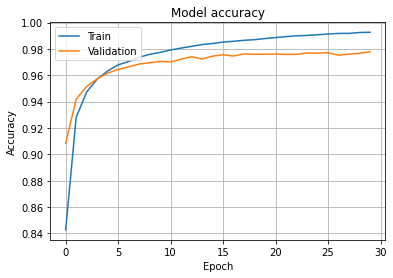

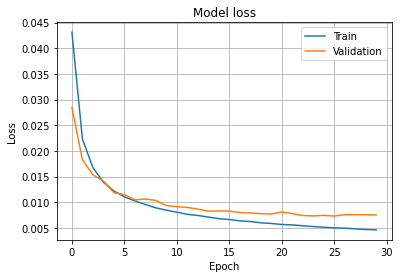

In [7]:
import matplotlib.pyplot as plt

#정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

#손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()